In [3]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cloth = pd.read_json("cloth_yelp.json", lines=True)
cloth.head(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [5]:
# We are predicting the quality of the garment.

In [6]:
cloth['quality'].value_counts()

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [7]:
cloth.shape

(82790, 18)

In [8]:
cloth.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [9]:
# Removing columns having too much null values first.

cloth = cloth.drop(['item_id', 'waist'], axis = 1)

cloth.head(2)

,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


In [10]:
# Removing columns which wont provide much information.

cloth = cloth.drop(['user_name', 'user_id', 'review_summary',	'review_text'], axis = 1)

cloth.head(2)

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,just right,small,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,just right,small,NaN,NaN


In [11]:
new_cloth = cloth.dropna(how = 'any')

In [12]:
new_cloth.shape

(7000, 12)

In [13]:
# Finding categorical data:

new_cloth['cup size'].value_counts()

c         1670
d         1419
b         1325
dd/e      1031
ddd/f      612
a          453
dddd/g     263
h           89
k           40
j           35
aa          34
i           29
Name: cup size, dtype: int64

In [14]:
new_cloth['category'].value_counts()

new          1775
tops         1754
bottoms      1442
dresses      1410
outerwear     367
sale          242
wedding        10
Name: category, dtype: int64

In [15]:
new_cloth['length'].value_counts()

just right        5231
slightly long     1012
slightly short     510
very long          197
very short          50
Name: length, dtype: int64

In [16]:
new_cloth['fit'].value_counts()

fit      4798
large    1161
small    1041
Name: fit, dtype: int64

In [17]:
# Converting the categorical data:

from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [18]:
name_list = ['cup size', 'category', 'length', 'fit', 'shoe width']

for name in name_list:
  new_cloth[name] = label_encoded(new_cloth[name])

new_cloth.head(3) 

cup size ['a' 'aa' 'b' 'c' 'd' 'dd/e' 'ddd/f' 'dddd/g' 'h' 'i' 'j' 'k']
category ['bottoms' 'dresses' 'new' 'outerwear' 'sale' 'tops' 'wedding']
length ['just right' 'slightly long' 'slightly short' 'very long' 'very short']
fit ['fit' 'large' 'small']
shoe width ['average' 'narrow' 'wide']


C:\Users\sadpa\AppData\Local\Temp\ipykernel_6324\1818322394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cloth[name] = label_encoded(new_cloth[name])


,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34,5ft 1in,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43,5ft 4in,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35,5ft 2in,1,2,6.0,0


In [19]:
clothes_copy = new_cloth.copy()

In [20]:
def ref1(x):
  vari = np.nan
  try:  
    vari = float(x)
  except:
    vari = np.nan
  return vari

clothes_copy['bust'] = clothes_copy['bust'].map(ref1)

In [21]:
clothes_copy['bust'].isnull().sum()

1

In [22]:
clothes_copy = clothes_copy.dropna(how = 'any')

In [23]:
import re
lis = clothes_copy['height'][:5].to_list()
print(lis)
k = []
p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
if re.search(p, lis[0]) is not None:
    for catch in re.finditer(p, lis[0]):
        k.append(int(catch[0]))

k

['5ft 1in', '5ft 4in', '5ft 2in', '5ft 2in', '5ft 7in']


[5, 1]

In [24]:
# Trying to extract data from height column.
height_list = clothes_copy['height'].to_list()
updated = []

def extractSize(x):
  numbers = []
  p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
  if re.search(p, x) is not None:
    for catch in re.finditer(p, x):
        numbers.append(int(catch[0]))
  # print(len(numbers))
  if len(numbers) == 2:
    fina = numbers[1] + numbers[0]*12
  elif len(numbers) == 1:
    fina = numbers[0] * 12
  else:
    fina = np.nan
  return fina

for height in height_list:
  updated.append(extractSize(height))

clothes_copy['height_inches'] = updated

In [25]:
clothes_copy.head()

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width,height_inches
23,5,5.0,3,32.0,34.0,2,34.0,5ft 1in,0,2,7.0,0,61
40,18,5.0,6,44.0,38.0,2,43.0,5ft 4in,0,2,8.5,0,64
49,11,5.0,3,37.0,36.0,2,35.0,5ft 2in,1,2,6.0,0,62
65,9,5.0,3,42.0,38.0,2,38.0,5ft 2in,2,0,7.0,0,62
100,20,3.0,3,45.0,40.0,2,38.0,5ft 7in,0,0,10.0,0,67


In [26]:
clothes_copy['height_inches'].isnull().sum()

0

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

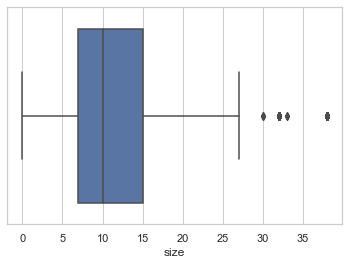

In [27]:
sns.set_theme(style="whitegrid")
sns.boxplot(clothes_copy['size'])

C:\Users\sadpa\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height_inches'>

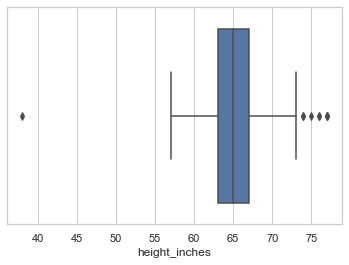

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(clothes_copy['height_inches'])

In [29]:
# clothes_copy = clothes_copy[clothes_copy['height_inches'] > 57]
# clothes_copy = clothes_copy[clothes_copy['height_inches'] < 74]
# clothes_copy = clothes_copy[clothes_copy['hips'] < 53]
# clothes_copy = clothes_copy[clothes_copy['bra size'] < 40]
# clothes_copy = clothes_copy[clothes_copy['bra size'] > 30]
# clothes_copy = clothes_copy[clothes_copy['bust'] > 24]
# clothes_copy = clothes_copy[clothes_copy['bust'] < 48]

In [30]:
clothes_copy.shape

(6999, 13)

<AxesSubplot:>

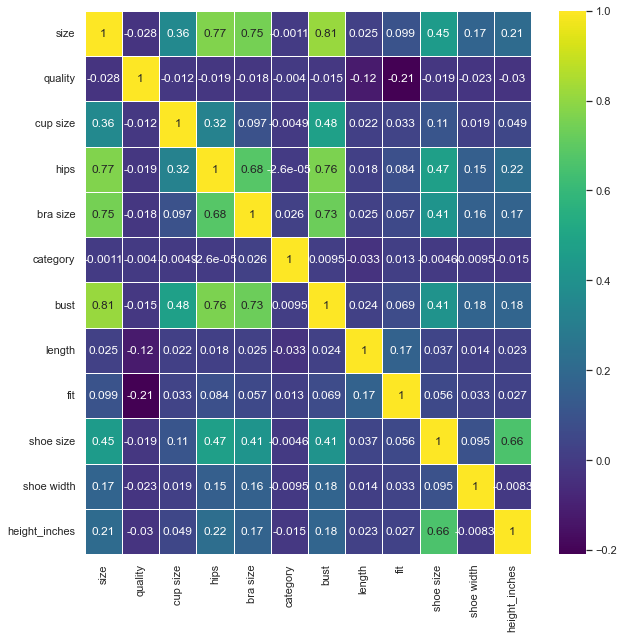

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(clothes_copy.corr(),annot=True,cmap='viridis',linewidths=.5)

In [32]:
y = clothes_copy['quality']
X = clothes_copy.drop(['quality', 'height', 'hips', 'bust'], axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [35]:
random_model = RandomForestClassifier(n_estimators=250, n_jobs = -1)

In [36]:
#Fit
random_model.fit(Xtrain, ytrain)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.82 %


In [37]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

42.86 %


In [38]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('Clothes.pickle','wb'))